In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("./ifood-restaurants-february-2021.csv", sep=",",header=0)

In [4]:
df.head(5)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

SELECIONANDO VARIAVEIS CONVENIENTES 


In [6]:
df_sel = df[["availableForScheduling", "category", "delivery_fee", "delivery_time", "price_range","minimumOrderValue"]]

In [7]:
#classificar tipos de variáveis
numericas = df_sel.select_dtypes(include=['number']).columns.to_list()
categoricas =df_sel.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Variáveis Numéricas", numericas)
print("Variáveis Categóricas", categoricas)

Variáveis Numéricas ['delivery_fee', 'delivery_time', 'minimumOrderValue']
Variáveis Categóricas ['availableForScheduling', 'category', 'price_range']


USANDO FUNÇÃO describe()

In [8]:
df_sel.describe()

,delivery_fee,delivery_time,minimumOrderValue
count,406399.000000,406399.000000,4.063990e+05
mean,6.804577,47.432747,2.768909e+02
std,4.315815,19.662736,1.570668e+05
min,0.000000,-1.000000,0.000000e+00
25%,4.000000,35.000000,1.000000e+01
50%,6.000000,45.000000,1.500000e+01
75%,9.490000,60.000000,2.000000e+01
max,35.000000,5050.000000,1.000000e+08


USANDO FUNÇÃO mode() (moda)

In [9]:
df_sel["category"].mode()

0    Lanches
Name: category, dtype: object

In [10]:
type(df_sel["category"].mode())

pandas.core.series.Series

In [11]:
df_sel['category'].mode()[0]

'Lanches'

In [12]:
#variáveis booleans
df_sel["availableForScheduling"].mode()

0    False
Name: availableForScheduling, dtype: bool

In [13]:
#variaveis numericas
df_sel['delivery_fee'].mode()

0    0.0
Name: delivery_fee, dtype: float64

Avaliando a moda das variáveis

In [14]:
for variavel in categoricas:
    contagens = df_sel[variavel].value_counts()

    if len(contagens) >=5:
        print("<><><><><><><><><><><><><>")
        print(f"Variável {variavel}")
        print(f"Moda: {df_sel[variavel].mode()[0]}\n")
        print(f"{contagens.iloc[0:5]}\n")
    else:
        print("<><><><><><><><><><><><><>")
        print(f"Variável {variavel}")
        print(f"Moda: {df_sel[variavel].mode()[0]}\n")
        print(f"{contagens.iloc[0:5]}\n")

<><><><><><><><><><><><><>
Variável availableForScheduling
Moda: False

availableForScheduling
False    404702
True       1697
Name: count, dtype: int64

<><><><><><><><><><><><><>
Variável category
Moda: Lanches

category
Lanches          98946
Brasileira       73348
Doces & Bolos    39828
Pizza            36819
Açaí             22110
Name: count, dtype: int64

<><><><><><><><><><><><><>
Variável price_range
Moda: CHEAPEST

price_range
CHEAPEST          294140
MODERATE           44769
CHEAP              43100
EXPENSIVE          15778
MOST_EXPENSIVE      8612
Name: count, dtype: int64



USANDO A FUNÇÃO mean() (média)

In [15]:
numericas

['delivery_fee', 'delivery_time', 'minimumOrderValue']

In [16]:
df_sel['delivery_fee'].mean()

np.float64(6.804577004372552)

In [17]:
df_sel[numericas].mean()

delivery_fee           6.804577
delivery_time         47.432747
minimumOrderValue    276.890929
dtype: float64

In [18]:
float(df_sel['delivery_fee'].mean())

6.804577004372552

In [19]:
for variavel in numericas:
    print(f"Média Variável{variavel}: {float(df_sel[variavel].mean())}")

Média Variáveldelivery_fee: 6.804577004372552
Média Variáveldelivery_time: 47.43274712782266
Média VariávelminimumOrderValue: 276.89092923456997


USANDO A FUNÇÃO median() (mediana)

In [20]:
df_sel['delivery_fee'].median()

np.float64(6.0)

In [21]:
float(df_sel['delivery_fee'].median())

6.0

In [22]:
df_sel[numericas].median()

delivery_fee          6.0
delivery_time        45.0
minimumOrderValue    15.0
dtype: float64

In [23]:
for variavel in numericas:
    print(f"Média Variavel{variavel}: {float(df_sel[variavel].mean())}")
    print(f"Mediana Variavel{variavel}: {float(df_sel[variavel].median())}\n")

Média Variaveldelivery_fee: 6.804577004372552
Mediana Variaveldelivery_fee: 6.0

Média Variaveldelivery_time: 47.43274712782266
Mediana Variaveldelivery_time: 45.0

Média VariavelminimumOrderValue: 276.89092923456997
Mediana VariavelminimumOrderValue: 15.0



In [24]:
df_sel['minimumOrderValue'].max()

np.float64(99999999.99)

CALCULANDO AMPLITUDE 


In [25]:
numericas = df.select_dtypes(include=['number']).columns.tolist()

In [26]:
numericas

['delivery_fee',
 'delivery_time',
 'distance',
 'ibge',
 'minimumOrderValue',
 'rating']

In [27]:
#removendo o ibge da lista de numericas
numericas.pop(3)

'ibge'

In [28]:
df[numericas].describe()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
count,406399.000000,406399.000000,406399.000000,4.063990e+05,406399.000000
mean,6.804577,47.432747,4.219752,2.768909e+02,2.522241
std,4.315815,19.662736,68.329379,1.570668e+05,2.286103
min,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,35.000000,1.750000,1.000000e+01,0.000000
50%,6.000000,45.000000,3.080000,1.500000e+01,3.958900
75%,9.490000,60.000000,4.830000,2.000000e+01,4.718750
max,35.000000,5050.000000,11810.190000,1.000000e+08,5.000000


In [29]:
for variavel in numericas:
    amplitude = df[variavel].max() - df[variavel].min()
    print(f"A amplitude da {variavel} é: {amplitude}")

A amplitude da delivery_fee é: 35.0
A amplitude da delivery_time é: 5051
A amplitude da distance é: 11810.19
A amplitude da minimumOrderValue é: 99999999.99
A amplitude da rating é: 5.0


CALCULANDO A VARIÂNCIA E O DESVIO PADRÃO

In [30]:
df.head(5)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [31]:
#.var() é a variancia  
df[numericas].var()

delivery_fee         1.862626e+01
delivery_time        3.866232e+02
distance             4.668904e+03
minimumOrderValue    2.466997e+10
rating               5.226266e+00
dtype: float64

In [32]:
#.std() é o desvio padrao  
df[numericas].std()

delivery_fee              4.315815
delivery_time            19.662736
distance                 68.329379
minimumOrderValue    157066.758573
rating                    2.286103
dtype: float64

In [33]:
#calculando a variância e o desvio padrao para cada coluna 
variancia = df[numericas].var()
desvio_padrao = df[numericas].std()
print("Variância: ")
print(variancia)
print("\nDesvio Padrão")
print(desvio_padrao)

Variância: 
delivery_fee         1.862626e+01
delivery_time        3.866232e+02
distance             4.668904e+03
minimumOrderValue    2.466997e+10
rating               5.226266e+00
dtype: float64

Desvio Padrão
delivery_fee              4.315815
delivery_time            19.662736
distance                 68.329379
minimumOrderValue    157066.758573
rating                    2.286103
dtype: float64


In [34]:
df[numericas].describe()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
count,406399.000000,406399.000000,406399.000000,4.063990e+05,406399.000000
mean,6.804577,47.432747,4.219752,2.768909e+02,2.522241
std,4.315815,19.662736,68.329379,1.570668e+05,2.286103
min,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,35.000000,1.750000,1.000000e+01,0.000000
50%,6.000000,45.000000,3.080000,1.500000e+01,3.958900
75%,9.490000,60.000000,4.830000,2.000000e+01,4.718750
max,35.000000,5050.000000,11810.190000,1.000000e+08,5.000000


TRABALHANDO COM BOXPLOT

C:\Users\thili\AppData\Local\Temp\ipykernel_2708\853855592.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['delivery_time'], labels =['Tempo de Entrega'])


Text(0, 0.5, 'Valores')

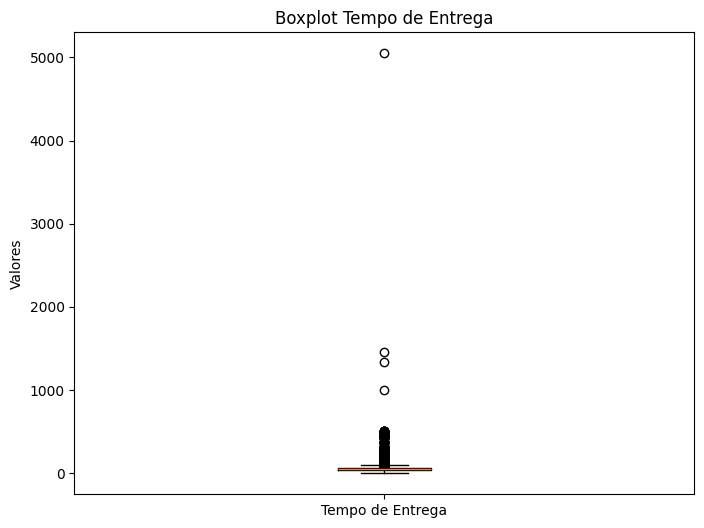

In [35]:
plt.figure(figsize=(8,6))
plt.boxplot(df['delivery_time'], labels =['Tempo de Entrega'])
plt.title('Boxplot Tempo de Entrega')
plt.ylabel('Valores')


In [36]:
#precisamos retirar os outliers
#vamos usar o método interquartil
#.quantile() eu determino se quero 0.25 (Q1) ou 0.75 (Q3)
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
df_out =df[((df['delivery_time'] < (Q1 - 1.5 * IQR)) | (df['delivery_time'] > (Q3 + 1.5 * IQR)))] 

In [38]:
df_out.head(3)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
29,False,https://static-images.ifood.com.br/image/uploa...,Mercado,15.0,120,13.21,5300108,50.0,Feirinha Delivery de Frutas & Verduras 2,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,MOST_EXPENSIVE,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ LO...,https://www.ifood.com.br/delivery/brasilia-df/...
188,False,https://static-images.ifood.com.br/image/uploa...,Lanches,10.0,100,9.98,1302603,0.0,Sir. Batata,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,CHEAP,0.0,ADDRESS_PREFORM_TYPE $$ BOMEBARATO_CUPOM $$ GU...,https://www.ifood.com.br/delivery/manaus-am/si...
330,False,https://static-images.ifood.com.br/image/uploa...,Saudável,12.0,120,4.89,3304557,120.0,LIFE FIT,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,EXPENSIVE,0.0,ADDRESS_PREFORM_TYPE $$ FIDELIDADE_SAUDAVEIS_D...,https://www.ifood.com.br/delivery/rio-de-janei...


In [39]:
print(f'Quantidade de registros na base: {len(df)}')

Quantidade de registros na base: 406399


In [40]:
print(f'Quantidade de registros de outliers na base: {len(df_out)}')
print(f'Percentual de outliers na base: {np.round(100*len(df_out)/len(df),0)}%')

Quantidade de registros de outliers na base: 3857
Percentual de outliers na base: 1.0%


In [41]:
#usando as mesmas condicionais que fizemos para gerar o df_out, para com o sinal de ~ para salvarmos somente as condições 
#que retornaram como falsas, "o ~ pegamos o inverso do que pedimos para a função"
df_sem_out = df[~((df['delivery_time']<(Q1 - 1.5 * IQR)) | (df['delivery_time']>(Q3 + 1.5 * IQR)))]

C:\Users\thili\AppData\Local\Temp\ipykernel_2708\4166583103.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_sem_out['delivery_time'], labels =['Tempo de Entrega'])


Text(0, 0.5, 'Valores')

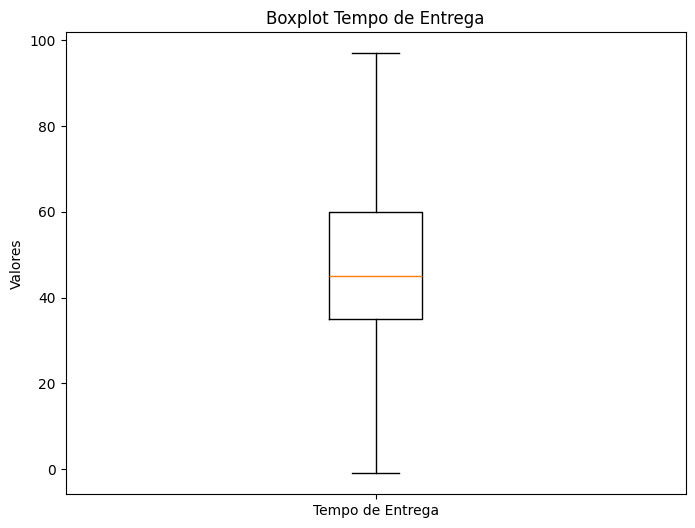

In [42]:
#gerando agora o grafico de bloxplot com o df_sem_out 
plt.figure(figsize=(8,6))
plt.boxplot(df_sem_out['delivery_time'], labels =['Tempo de Entrega'])
plt.title('Boxplot Tempo de Entrega')
plt.ylabel('Valores')

RETIRANDO OUTLIERS  

In [ ]:
#mais uma vez declarando a variavel numerica e criando uma listas, com todas as variaveis numericas do meu df  
numericas = df.select_dtypes(include=['number']).columns.tolist()
numericas

['delivery_fee',
 'delivery_time',
 'distance',
 'ibge',
 'minimumOrderValue',
 'rating']

In [45]:
numericas.pop(3)

'ibge'

In [46]:
df[numericas].quantile(0.25)

delivery_fee          4.00
delivery_time        35.00
distance              1.75
minimumOrderValue    10.00
rating                0.00
Name: 0.25, dtype: float64

In [47]:
df[numericas].quantile(0.75)

delivery_fee          9.49000
delivery_time        60.00000
distance              4.83000
minimumOrderValue    20.00000
rating                4.71875
Name: 0.75, dtype: float64

In [48]:
df[numericas].median()

delivery_fee          6.0000
delivery_time        45.0000
distance              3.0800
minimumOrderValue    15.0000
rating                3.9589
dtype: float64

In [ ]:
#faz o calculo de forma geral   
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)
mediana = df[numericas].median()
IQR = Q3 - Q1
IQR

delivery_fee          5.49000
delivery_time        25.00000
distance              3.08000
minimumOrderValue    10.00000
rating                4.71875
dtype: float64

In [56]:
df[(df[numericas]< (Q1 - 1.5 * IQR))]

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#condicional para salvar todos os outliers em um df para comparativos 
outliers_geral= df[((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_geral.head(3)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
24,False,https://static-images.ifood.com.br/image/uploa...,Lanches,9.0,80,9.53,5300108,0.0,Kelly Crepes & Massas,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ HA...,https://www.ifood.com.br/delivery/brasilia-df/...
29,False,https://static-images.ifood.com.br/image/uploa...,Mercado,15.0,120,13.21,5300108,50.0,Feirinha Delivery de Frutas & Verduras 2,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,MOST_EXPENSIVE,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ LO...,https://www.ifood.com.br/delivery/brasilia-df/...
36,False,https://static-images.ifood.com.br/image/uploa...,Lanches,12.0,90,10.88,5300108,10.0,Tapioca da Zi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ JE...,https://www.ifood.com.br/delivery/brasilia-df/...


In [66]:
print(f'Quantidade de registro na base:{len(df)}')
print(f'Quantidade de outliers na base: {len(outliers_geral)}')
print(f'Percentual de outliers {np.round(100*len(outliers_geral)/len(df),0)} %')

Quantidade de registro na base:406399
Quantidade de outliers na base: 14725
Percentual de outliers 4.0 %


In [68]:
df_sem_out = df[~((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [69]:
print(f'Quantidade de linhas sem outliers = {len(df_sem_out)}')

Quantidade de linhas sem outliers = 391674


In [70]:
df_sem_out.head(2)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...


In [ ]:
#SALVANDO ARQUIVO CSV
columns_to_use =[
    "availableForScheduling",
    "category",
    "delivery_fee",
    "delivery_time",
    "distance",
    "minimumOrderValue",
    "price_range",
    "rating"
]

df_final=df_sem_out[columns_to_use]

In [73]:
df_final.to_csv("./base_ifood_limpa.csv", sep=";", header=True)